In [4]:
from importlib import reload
from two_transmons import Rabi
reload(Rabi)
from scipy.optimize import *
from two_transmons.Rabi import *
import two_transmons.DoubleTransmonSystem
from two_transmons.DoubleTransmonSystem import *
import two_transmons.VacuumRabiSimulation
from two_transmons.VacuumRabiSimulation import *
import single_transmon.Transmon
from single_transmon.Transmon import *
from ReadoutResonator import *
from qutip import *
from tqdm.notebook import tqdm
from two_transmons.ZPulse import *
from importlib import reload
import two_transmons.ParallelCalculations
from two_transmons.ParallelCalculations import *
from two_transmons.CalcTime import *
from two_transmons.Tomography import *
from scipy.linalg import cholesky
from p_tqdm import p_map, p_imap
import time

In [5]:
Nc = 7
Ec1 = 0.25 * 2 * np.pi
Ec2 = 1.03*Ec1
Ecc = 0.01/1.2**2 * 2 * np.pi # 1.2 is my estimate for n_{ge} matrix element
Ej1 = Ec1 * 100
Ej2 = Ec2 * 100
d = 0.2

T1_1, T2_1 = 10e6, 5e6
T1_2, T2_2 = 5e6, 1e6

tr1 = Transmon(Ec1, Ej1, d, 1/T1_1, 1/T2_1, Nc, 3, 1)
tr2 = Transmon(Ec2, Ej2, d, 1/T1_2, 1/T2_2, Nc, 3, 2)
dts = DoubleTransmonSystem(tr1, tr2, Ecc)
r = ReadoutResonator(6, 1118, 1964, phi=0.29)
r.set_qubit_parameters(.05, 0.05, 5, 5.3, .2, .2)


freq_lim = 0.2
farg=cook_farg(20,freq_lim)
params=farg[0]['params']
Ts = linspace(0, params["finish"], params['t_points'])
T = Tomography(dts, Ts, params, r)

#print(params)

/tmp/ipykernel_1159615/3044549297.py:22: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  Ts = linspace(0, params["finish"], params['t_points'])


In [3]:
T._rho0 = dts.gg_state(0, 1/2) #initial state

In [ ]:
T.run()

/home/alexeitolstobrov/server/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/alexeitolstobrov/server/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/alexeitolstobrov/server/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/alexeitolstobrov/server/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/alexeitolstobrov/serve

In [ ]:
dm = [res.states for res in T._results]

## Average projections time evolution

In [7]:
T._2q_rotations

[((0, 0), (0, 0)),
 ((0, 0), (33.45, 0)),
 ((0, 0), (16.725, 0)),
 ((0, 0), (16.725, 3.141592653589793)),
 ((0, 0), (16.725, 1.5707963267948966)),
 ((0, 0), (16.725, -1.5707963267948966)),
 ((33.45, 0), (0, 0)),
 ((33.45, 0), (33.45, 0)),
 ((33.45, 0), (16.725, 0)),
 ((33.45, 0), (16.725, 3.141592653589793)),
 ((33.45, 0), (16.725, 1.5707963267948966)),
 ((33.45, 0), (16.725, -1.5707963267948966)),
 ((16.725, 0), (0, 0)),
 ((16.725, 0), (33.45, 0)),
 ((16.725, 0), (16.725, 0)),
 ((16.725, 0), (16.725, 3.141592653589793)),
 ((16.725, 0), (16.725, 1.5707963267948966)),
 ((16.725, 0), (16.725, -1.5707963267948966)),
 ((16.725, 3.141592653589793), (0, 0)),
 ((16.725, 3.141592653589793), (33.45, 0)),
 ((16.725, 3.141592653589793), (16.725, 0)),
 ((16.725, 3.141592653589793), (16.725, 3.141592653589793)),
 ((16.725, 3.141592653589793), (16.725, 1.5707963267948966)),
 ((16.725, 3.141592653589793), (16.725, -1.5707963267948966)),
 ((16.725, 1.5707963267948966), (0, 0)),
 ((16.725, 1.5707963267

In [8]:
H0 = T._H0[0][0]*T._H0[0][1][0] +T._H0[1][0]*T._H0[1][1][0] + T._H0[2][0]*T._H0[2][1][0]
t=Ts[-1]
interaction_picture = (1j*H0*t).expm()
dm_interaction =interaction_picture * dm[-10][-1] * (interaction_picture.dag())   

In [9]:
dm_interaction

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = False
Qobj data =
[[ 2.48342127e-01+0.00000000e+00j -9.85178884e-03+2.48469134e-01j
  -1.13896350e-02+5.11126588e-03j -2.48970934e-01-6.16373555e-03j
   1.76838022e-02-2.48571786e-01j  1.24745627e-02-4.73694948e-03j
  -5.04842650e-04-7.93194759e-03j  9.57348570e-03-7.34892871e-04j
   2.03628310e-04+4.70326047e-04j]
 [-9.85178884e-03-2.48469134e-01j  2.48894889e-01+0.00000000e+00j
   5.56899787e-03+1.11945744e-02j  3.72217738e-03+2.49254576e-01j
  -2.49787014e-01-7.36889473e-03j -5.43471542e-03-1.22433710e-02j
  -7.92046988e-03+8.59781895e-04j -1.41596731e-03-9.54589638e-03j
   4.40156415e-04-2.73205166e-04j]
 [-1.13896350e-02-5.11126588e-03j  5.56899787e-03-1.11945744e-02j
   6.27929399e-04+0.00000000e+00j  1.12938091e-02+5.40933618e-03j
  -5.92140874e-03+1.10714926e-02j -6.73541105e-04-2.81549402e-05j
  -1.38435458e-04+3.75619266e-04j -4.62369753e-04-1.47665361e-04j
  -3.21328923e-06-2.59189603e-05j]
 [-2.4

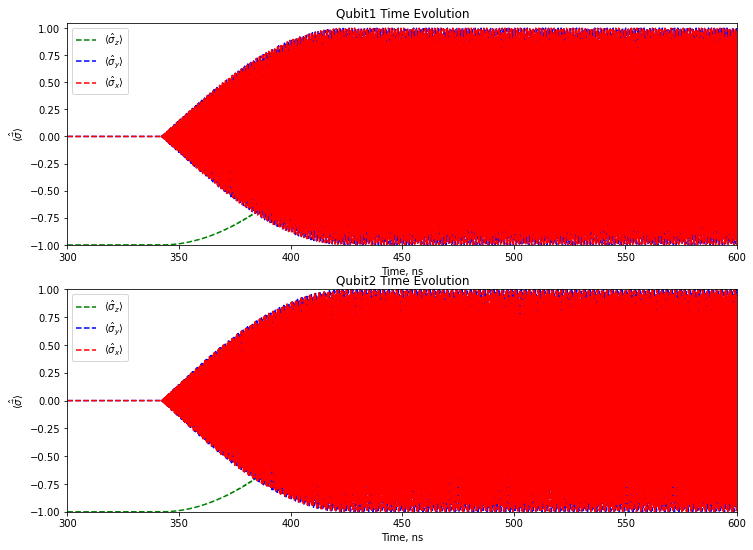

In [6]:

density_matrix = dm[-10]
#density_matrix = density_matrix*density_matrix.dag()/density_matrix.tr()
fig = figure (figsize = (12,9) )
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
qubit1_z = expect(T.build_2qubit_operator('Z','id'), density_matrix)
qubit1_y = expect(T.build_2qubit_operator('Y','id'), density_matrix)
qubit1_x = expect(T.build_2qubit_operator('X','id'), density_matrix)
ax1.plot(Ts, qubit1_z, '--', color="green", label = "$\\langle \hat \\sigma_z\\rangle$")
ax1.plot(Ts, qubit1_y, '--', color="blue", label = "$\\langle \hat \\sigma_y\\rangle$")
ax1.plot(Ts, qubit1_x, '--', color="red", label = "$\\langle \hat \\sigma_x\\rangle$")
ax1.set(ylim = [-1,1.05], xlim = [params['start'], params['finish']], xlabel = "Time, ns", \
        ylabel = r"$\langle\hat\vec\sigma\rangle$", title = "Qubit1 Time Evolution")
ax1.legend(loc=2)
qubit2_z = expect(T.build_2qubit_operator('id','Z'), density_matrix)
qubit2_y = expect(T.build_2qubit_operator('id','Y'), density_matrix)
qubit2_x = expect(T.build_2qubit_operator('id','X'), density_matrix)
ax2.plot(Ts, qubit2_z, '--', color="green", label = "$\\langle \hat \\sigma_z\\rangle$")
ax2.plot(Ts, qubit2_y, '--', color="blue", label = "$\\langle \hat \\sigma_y\\rangle$")
ax2.plot(Ts, qubit2_x, '--', color="red", label = "$\\langle \hat \\sigma_x\\rangle$")
ax2.set(ylim = [-1,1], xlim = [params['start'], params['finish']],xlabel = "Time, ns", \
        ylabel = r"$\langle\hat\vec\sigma\rangle$",title = "Qubit2 Time Evolution")
ax2.legend(loc=2)


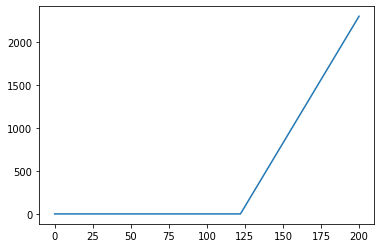

In [11]:
phase_2 = np.arctan2(qubit2_y, qubit2_x)
plot (Ts,np.unwrap(phase_2))

# Bloch sphere representation

### Schrödinger picture

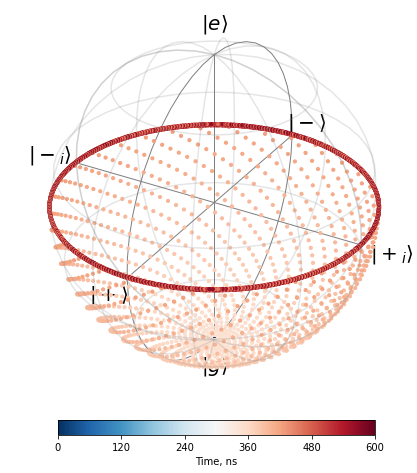

In [7]:
from qutip import *
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from matplotlib import cm



    
fig = figure(figsize=(7,7))
axes = fig.add_axes([0.1, 0.2, 0.8, 0.8], projection="3d")
#axes = fig.add_axes(projection = "3d")
sph = Bloch(fig=fig, axes=axes)
sph.clear()
sph.sphere_alpha = 0
sph.zlabel = [r'$\left|e\rightangle\right.$', r"$\left|g\rightangle\right.$"]
#sph.xlpos = [1.3, -1.3]
sph.xlabel = [r'$\left.|+\right\rangle$', r"$\left.|-\right\rangle$"]
#sph.ylpos = [1.2, -1.3]
sph.ylabel = [r'$\left.|+_i\right\rangle$', r"$\left.|-_i\right\rangle$"]
#sph.xlpos = [1.3, -1.3]
nrm=matplotlib.colors.Normalize(0,Ts[-1])
colors=cm.RdBu_r(nrm(Ts))
sph.point_size=[40]
sph.point_color = list(colors)
sph.point_marker=['.']
sph.add_points([qubit2_x, qubit2_y, qubit2_z], meth='m')
#sph.add_points ([[1/sqrt(2),1,0],[1/sqrt(2),0,0],[0,0,1]])  
sph.render(fig,axes)


m = cm.ScalarMappable(cmap=cm.RdBu_r, norm=nrm)
m.set_array(Ts)
m.set_clim(0, Ts[-1])
position=fig.add_axes([0.2,0.15,0.63,0.03])
cb = fig.colorbar(m, orientation='horizontal', cax=position)
cb.set_label("Time, ns")
cb.set_ticks(np.linspace(0,round(Ts[-1]),6))
sph.make_sphere()





### Interaction picture (in case of constant flow through both qubits)

## Several examples of rotations


In [9]:
fig = T.plot_qubits_dynamic(20)


AttributeError: 'Tomography' object has no attribute '_results'

In [10]:
fig = T.plot_qubits_dynamic(-10)

AttributeError: 'Tomography' object has no attribute '_results'

## Comparison of the tomographied state and the truth state


In [ ]:
T.find_rho_all_parallel(averages = 3)

  0%|          | 0/36 [00:00<?, ?it/s]

1.3481364123316582e-09 1.3481364123316582e-09
2.0431683768099137e-11 2.0431683768099137e-11
2.0431683768099137e-11 1.2110441245205975e-10
2.388012300685153e-08 2.388012300685153e-08
2.388012300685153e-08 2.5506301162701794e-08
2.386975481905455e-08 2.386975481905455e-08
27467.075250522226 27467.075250522226
3.05903552318753 3.05903552318753
1.3481466879130686 1.3481466879130686
1.276232775317986 1.276232775317986
1.276232775317986 1.2762327753987859
1.276232775317986 1.2762327758831837
1.8664155397092727e-07 1.8664155397092727e-07
1.8664155397092727e-07 2.538990469288027e-07
1.8664155397092727e-07 2.5530316800436e-07
1.5190871094458835e-07 1.5190871094458835e-07
1.5175288431972045e-07 1.5175288431972045e-07
1.5175288431972045e-07 1.571779951387799e-07
1.0160719090921828e-06 1.0160719090921828e-06
5.71958710216076e-07 5.71958710216076e-07
5.71958710216076e-07 6.35045058309075e-07
0.033171134236682887 0.033171134236682887
0.033171128499043676 0.033171128499043676
0.033171128499043676 0.0

In [ ]:
rot_number = 16
dm_true = T._results[rot_number].states[-1]
dm_my_estimate =T.rho_tomo[rot_number]

In [ ]:
fig1 = Tomography.show_density_matrix(dm_true)
fig2 = Tomography.show_density_matrix(dm_my_estimate)
fidelity = (dm_my_estimate*dm_true).tr()
print ('fidelity =', fidelity)
#fig1.savefig('23.09.2021 dm_simulation_' + str(rot_number) + '.png')
#fig2.savefig('23.09.2021 dm_tomography_' + str(rot_number) + '.png')

In [ ]:
dm_true-dm_my_estimate

## Defining an appropriate impulse duration

## Rabi oscillations

In [6]:
%matplotlib notebook

In [12]:
T = Tomography(dts, Ts, params, r)   # For this cell to work you should off iswap gate by changing Tomography. build_waveform
T._pi_duration = 33.45*5.00
T._options = Options(nsteps=20000, store_states=True)
T._c_ops =[] # T._dts.c_ops(0, 1/2)
#T._params['duration'] = 50
T._params['phiz_offset'] = 0.03
T._params['start']=200
T._params['t_zgate'] = 23.7*3
T._params['t_zgate2'] =0.3
dm, dm_final = T.run_iswap_test_step_parallel([(0,0),(T._pi_duration,0)],iswap2 = False, full_output = True)




/home/alexeitolstobrov/server/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


<IPython.core.display.Javascript object>


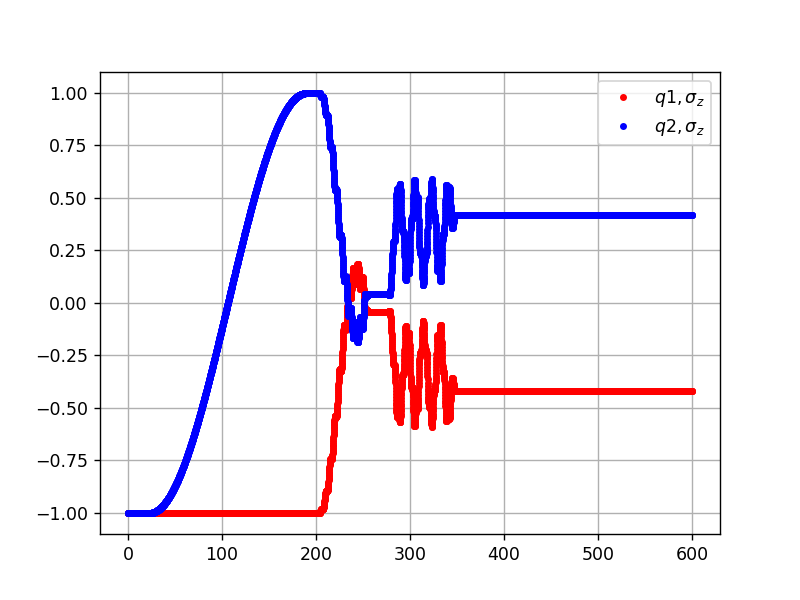

/home/alexeitolstobrov/server/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/alexeitolstobrov/server/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [13]:
figure()
#fig, ax = subplots(1,1)
qubit1_z = expect(T.build_2qubit_operator('Z','id'), dm)
qubit2_z = expect(T.build_2qubit_operator('id','Z'), dm)
plot(Ts,qubit1_z,'r.',label='$q1, \sigma_z $') #,ylim=[0,1])
plot(Ts,qubit2_z,'b.', label='$q2, \sigma_z $')
grid()
legend()
#ax.legend()
#ax.set_ylim([-1.0, 1.02])
#fig.savefig('19.10.2021 Rabi-oscillations 3 level qubit.png')

In [ ]:
figure()
qubit1_x = expect(T.build_2qubit_operator('X','id'), dm)
qubit2_x = expect(T.build_2qubit_operator('id','X'), dm)
plot(Ts,qubit1_x,'r.',label='$q1, \sigma_x $') #,ylim=[0,1])
plot(Ts,qubit2_x, 'b.', label='$q2, \sigma_x $')
grid()

In [ ]:
figure()
qubit1_y = expect(T.build_2qubit_operator('Y','id'), dm)
qubit2_y = expect(T.build_2qubit_operator('id','Y'), dm)
plot(Ts,qubit1_y,'r.',label='$q1, \sigma_y $') #,ylim=[0,1])
plot(Ts,qubit2_y, 'b.', label='$q2, \sigma_y $')
grid()

## I-swap подбор длительности

In [7]:
params = cook_farg(2, 0.2)[0]['params']
params['duration'] = 60

Rabi = Tomography (dts, Ts, params, r) 



dm, dm_final = Rabi.run_iswap_test_step_parallel([(Rabi._pi_duration,0),(0,0)], iswap2 = True, full_output = True)
qubit1_z = expect(Rabi.build_2qubit_operator('Z','id'), dm)
qubit2_z = expect(Rabi.build_2qubit_operator('id','Z'), dm)


/home/alexeitolstobrov/server/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


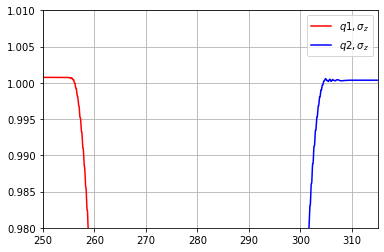

In [43]:
fig, ax = subplots(1,1)
ax.plot(Ts,qubit1_z,'r',label='$q1, \sigma_z $') #,ylim=[0,1])
ax.plot(Ts,qubit2_z,'b', label='$q2, \sigma_z $')

ax.legend()
#ax.set_ylim([-1.01,-0.98])
ax.set_ylim([0.98,1.01])
ax.set_xlim([250,315])
ax.grid()
#ax.set(title = 'frequency =' + str(freq))

### Разная длительность взаимодействия двух кубитов

/tmp/ipykernel_1025367/742810136.py:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  durations = linspace (49,52, 50)


<IPython.core.display.Javascript object>


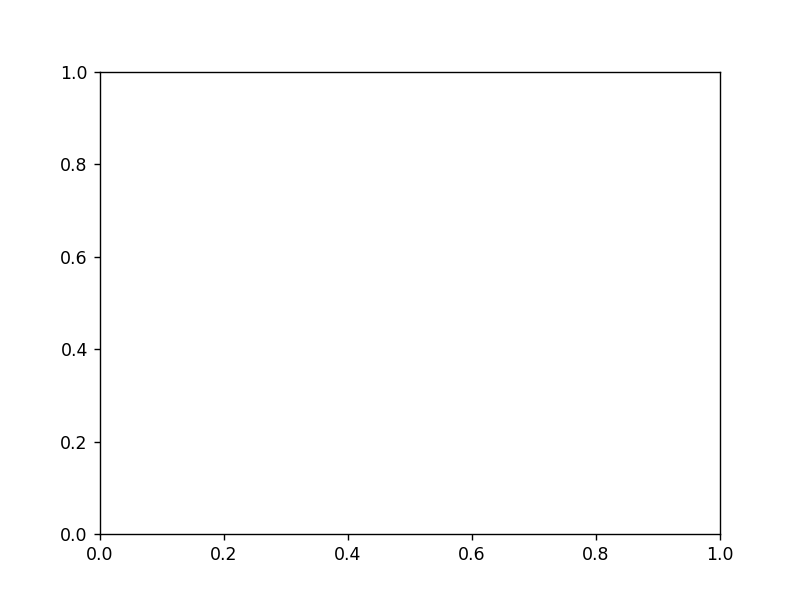

/home/alexeitolstobrov/server/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


KeyboardInterrupt: 

In [28]:
durations = linspace (49,52, 50)
params = cook_farg(2, 0.2)[0]['params']
qubit1_z = []
qubit2_z = []
fig, ax = subplots(1,1)
for dur in durations:
    T._params['duration'] = dur 
    dm = T.run_iswap_test_step_parallel([(T._pi_duration,0),(0,0)], iswap2 = False, full_output = True)
    qubit1_z.append(expect(T.build_2qubit_operator('Z','id'), dm[-1]))
    qubit2_z.append(expect(T.build_2qubit_operator('id','Z'), dm[-1]))
ax.plot(durations, qubit1_z,'r',label='$q1, \sigma_z $') #,ylim=[0,1])
ax.plot(durations, qubit2_z,'b', label='$q2, \sigma_z $')


### Defining an appropriate iswap pulse duration

In [14]:
def sigma_z_avg(dur,dts):
    params = cook_farg(2, 0.2)[0]['params']
    params['duration'] = dur
    dm = T.run_iswap_check()
    return(real(expect(Rabi.build_2qubit_operator('Z','id'), dm[-1])) + 1)


In [15]:
from scipy.optimize import *
minimize(sigma_z_avg,x0 = 31.5, args = (dts,))

/tmp/ipykernel_426812/2854916560.py:5: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
  return(real(expect(Rabi.build_2qubit_operator('Z','id'), dm[-1])) + 1)
capi_return is NULL
Call-back cb_f_in_zvode__user__routines failed.


KeyboardInterrupt: 

In [5]:
T._rho0 = dts.gg_state(0, 1/2) #initial state
T._pi_duration = 33.45
dm = T.run_iswap_check()


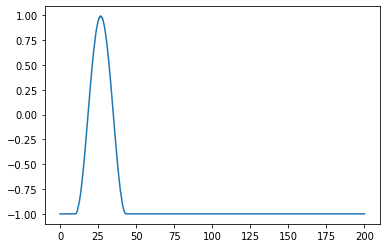

In [6]:
plot (T._Ts,expect(T.build_2qubit_operator('Z','id'),dm.states))